In [1]:
from SPV_utils import *
Ns = [100, 144, 196, 256, 324, 400, 1024]


batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0


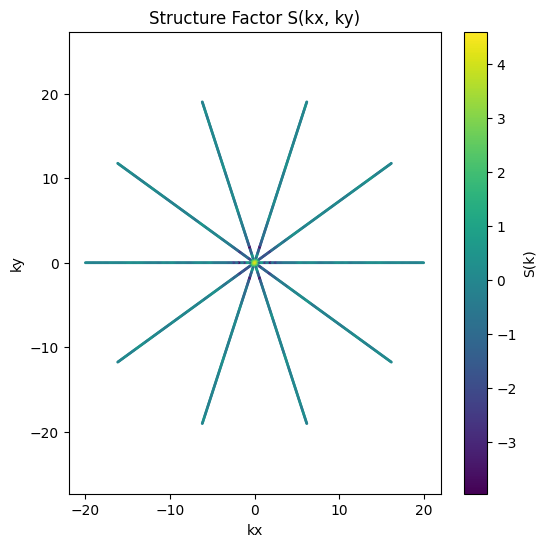

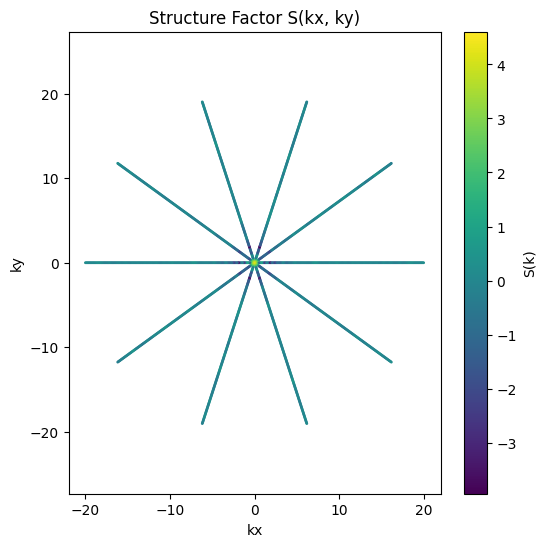

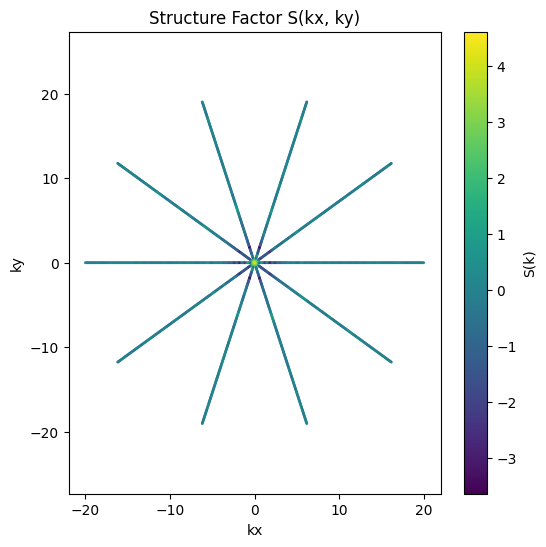

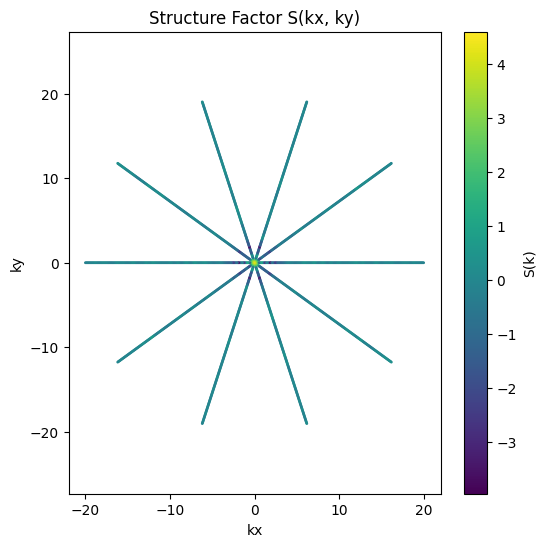

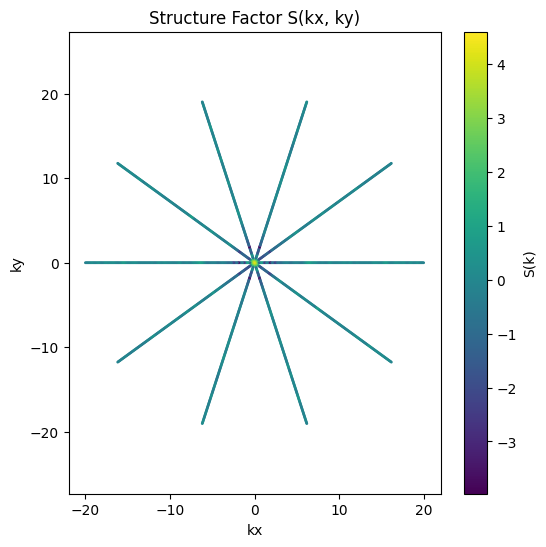

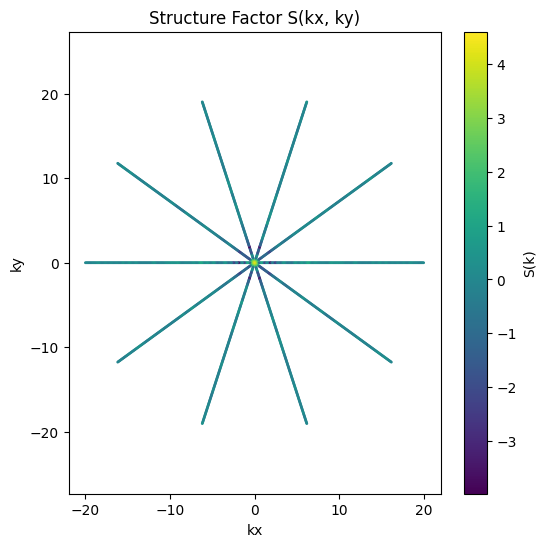

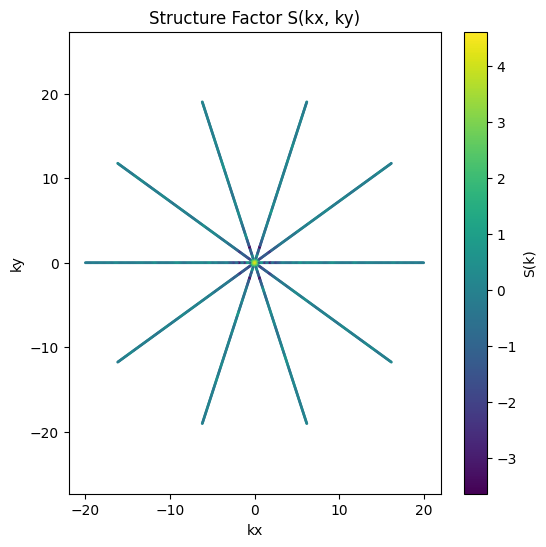

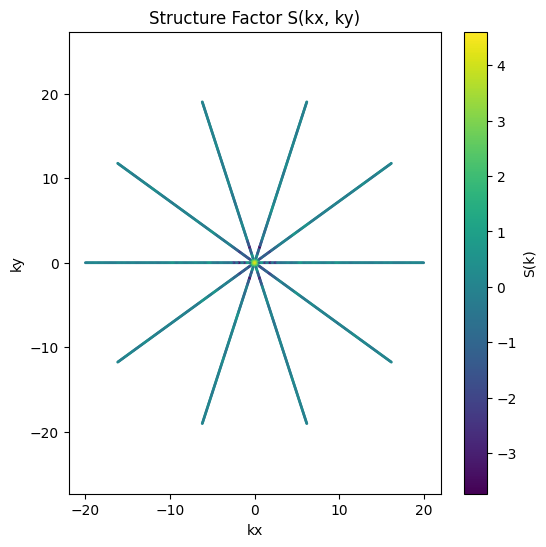

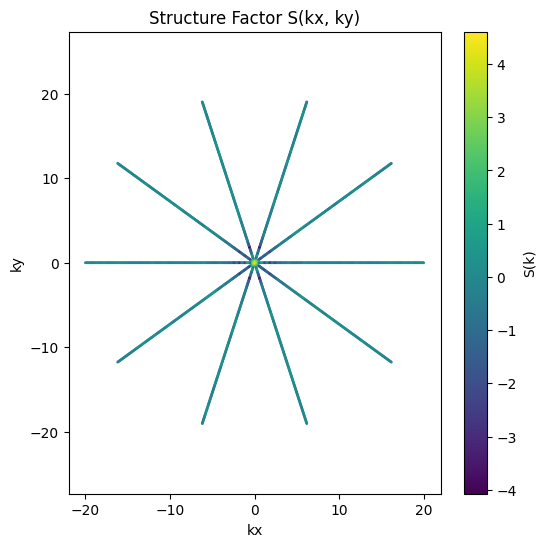

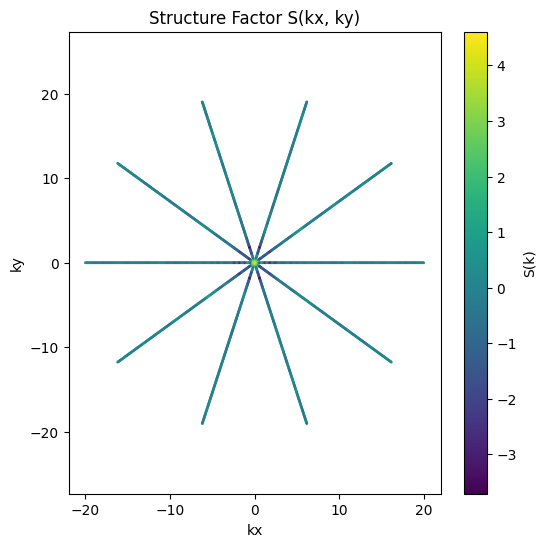

batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0


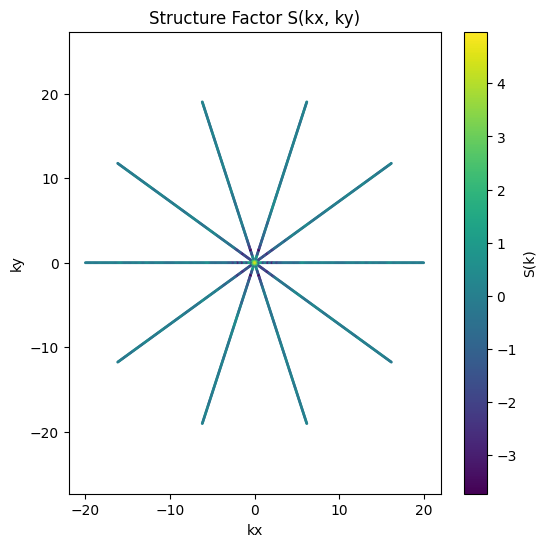

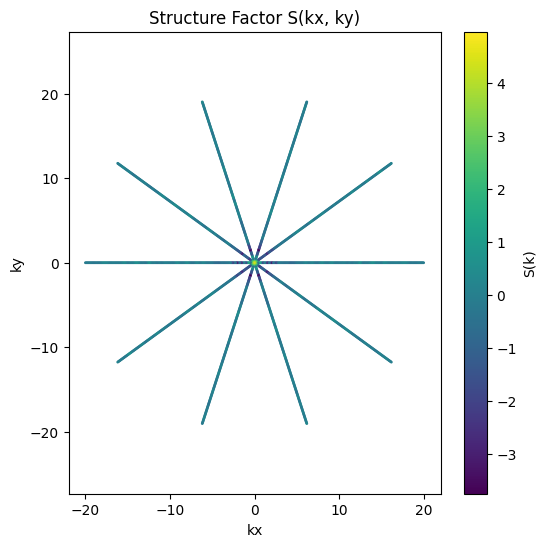

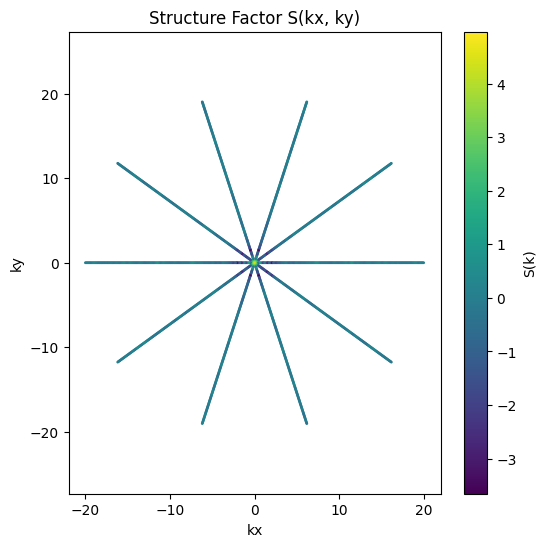

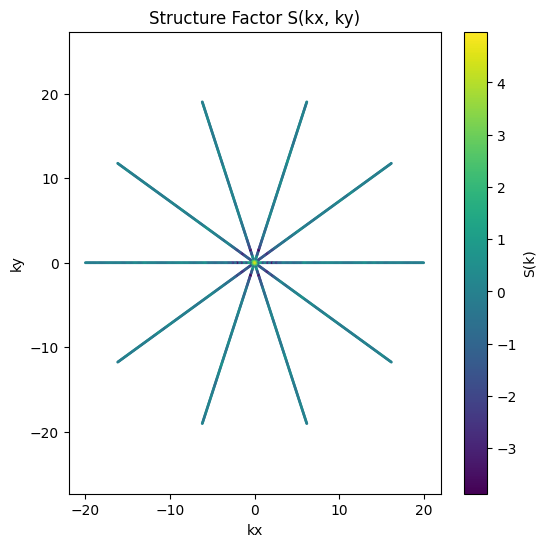

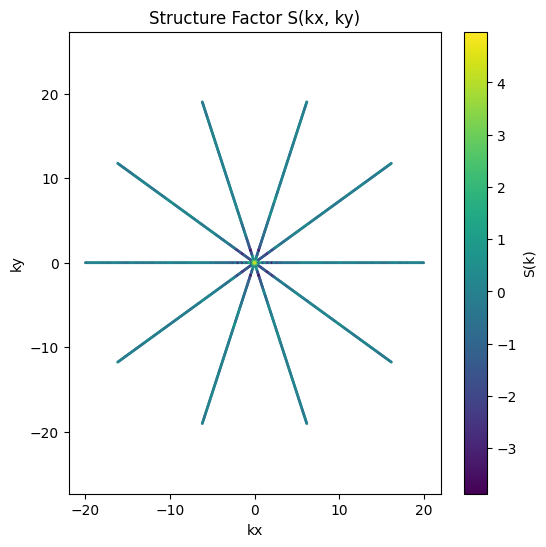

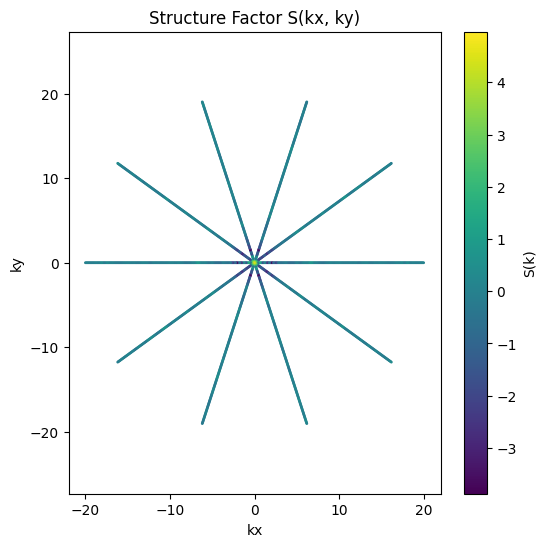

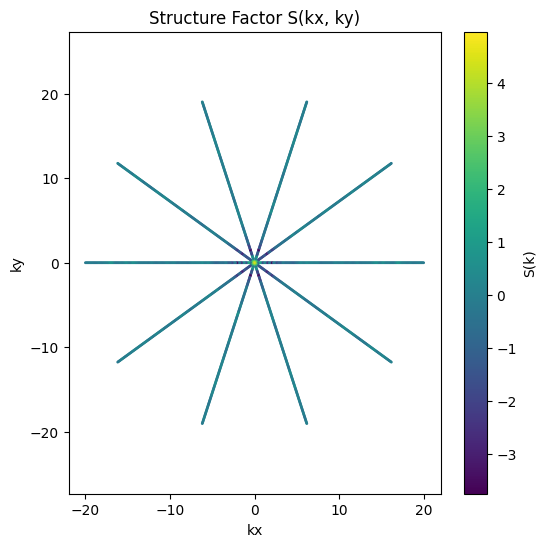

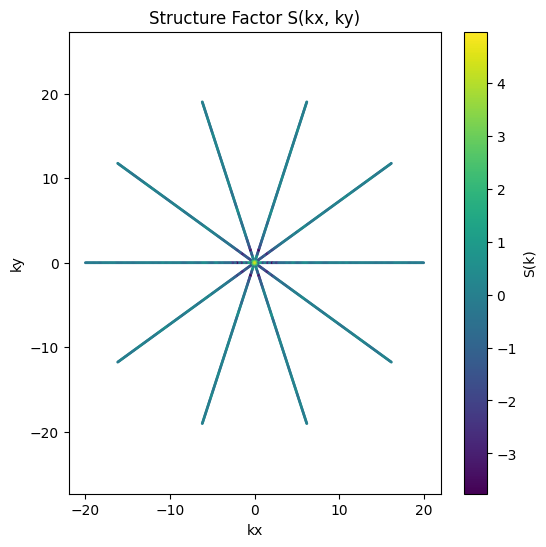

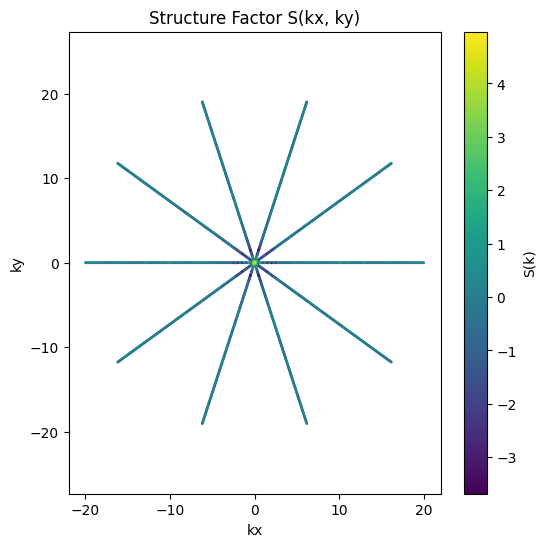

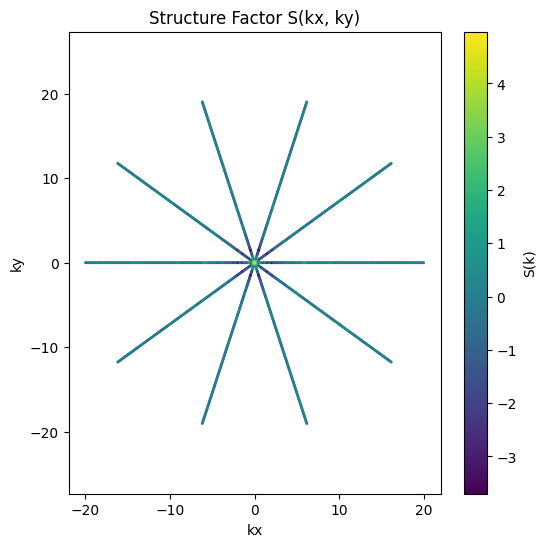

batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0


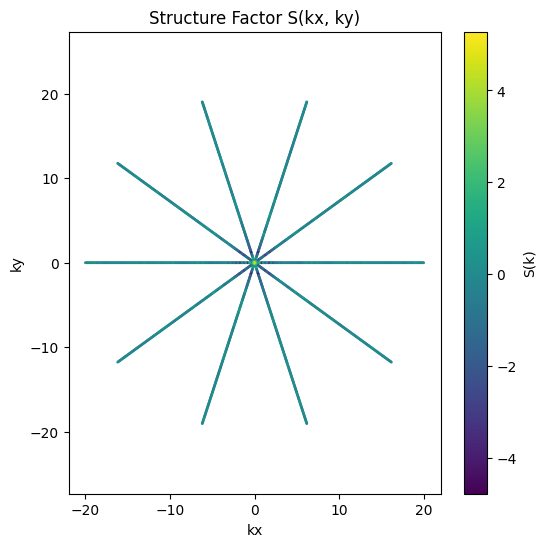

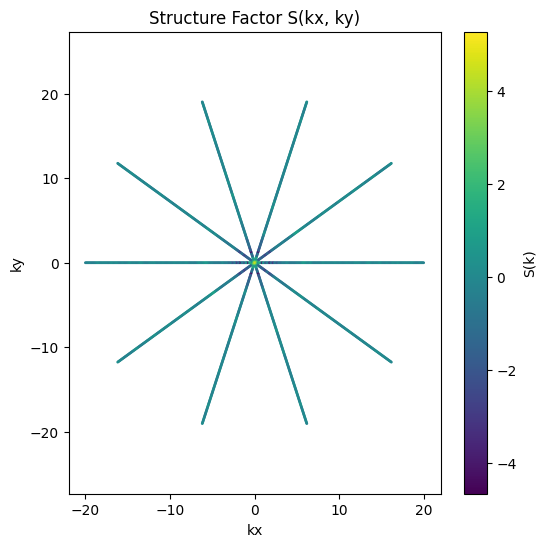

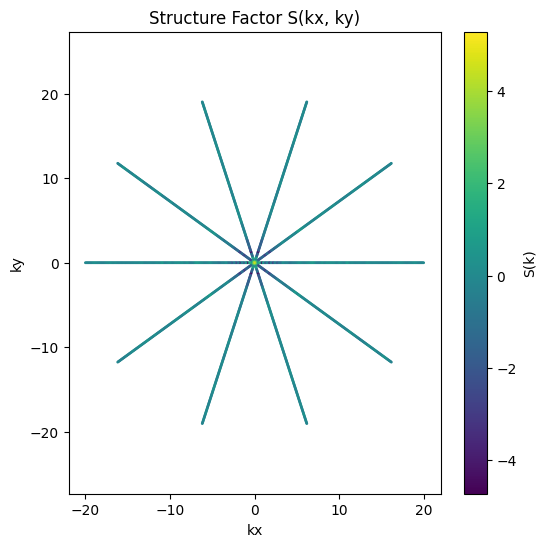

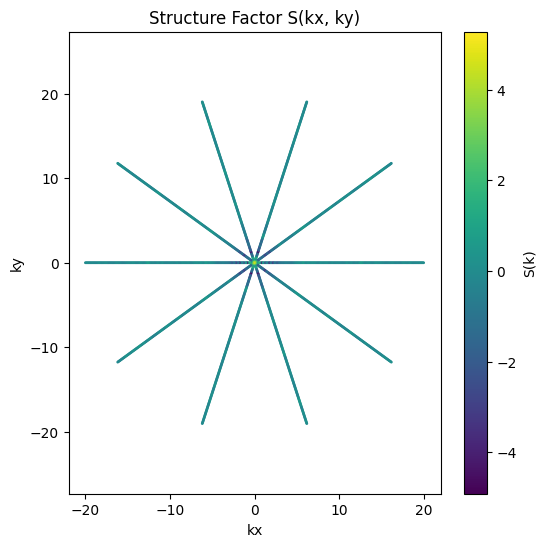

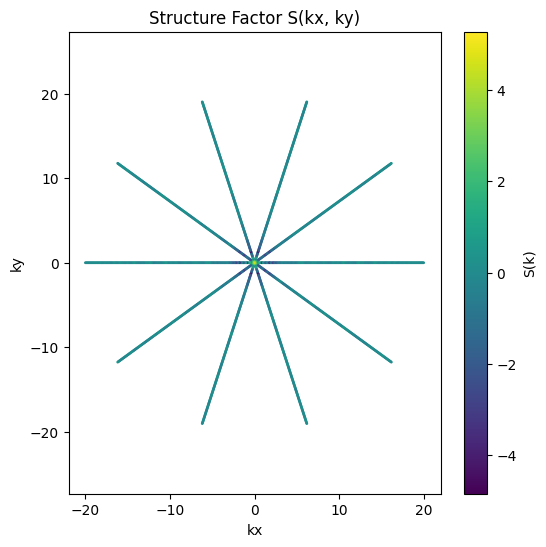

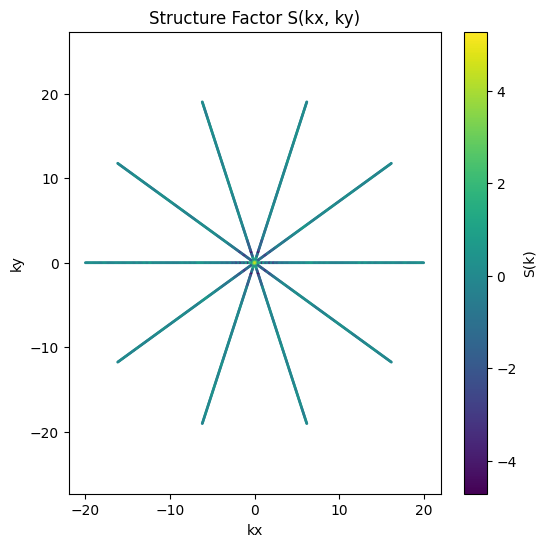

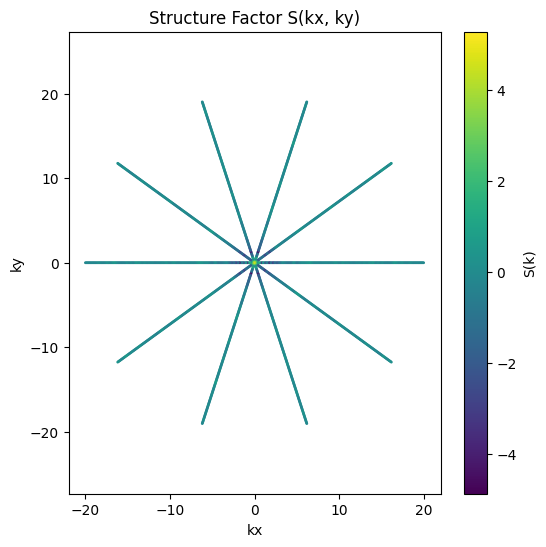

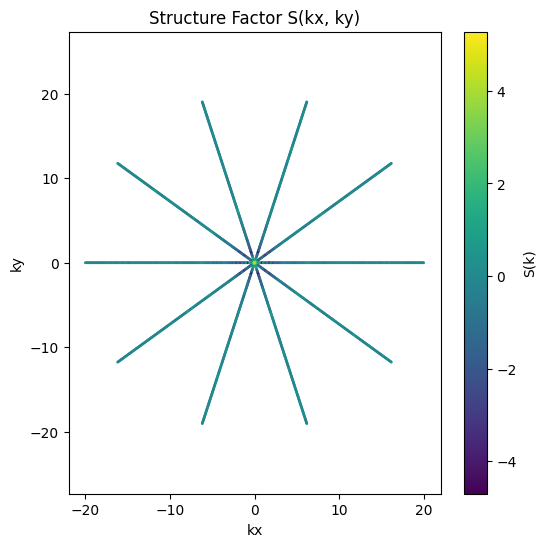

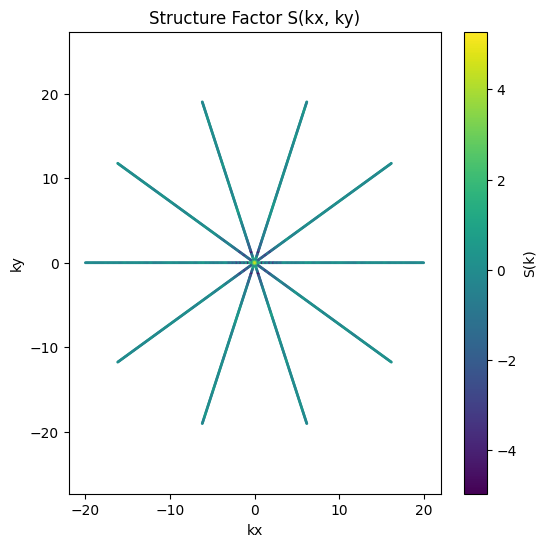

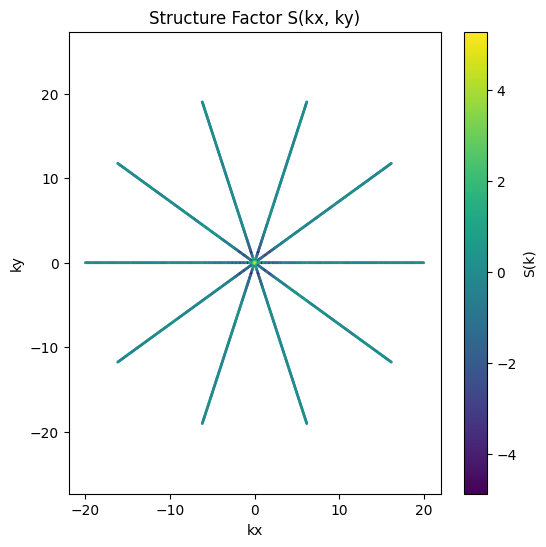

batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0


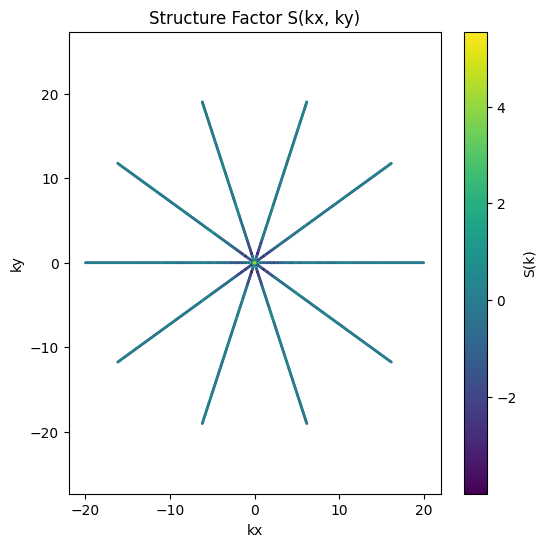

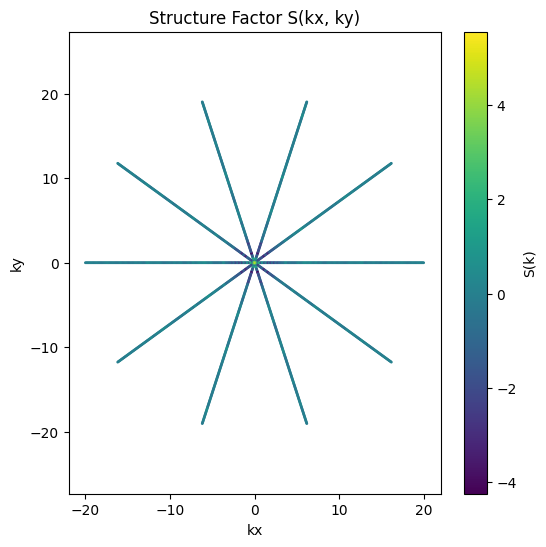

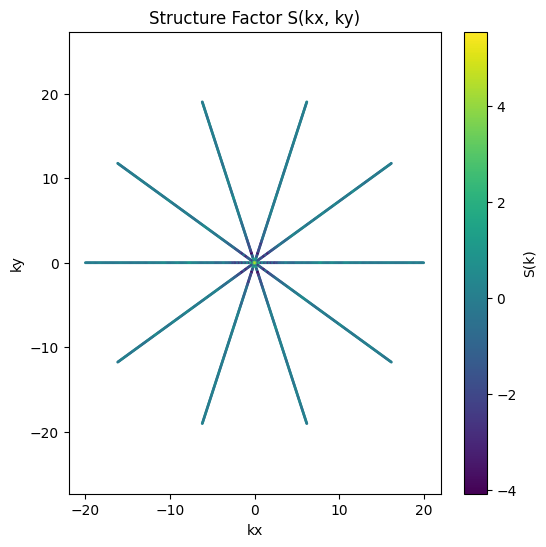

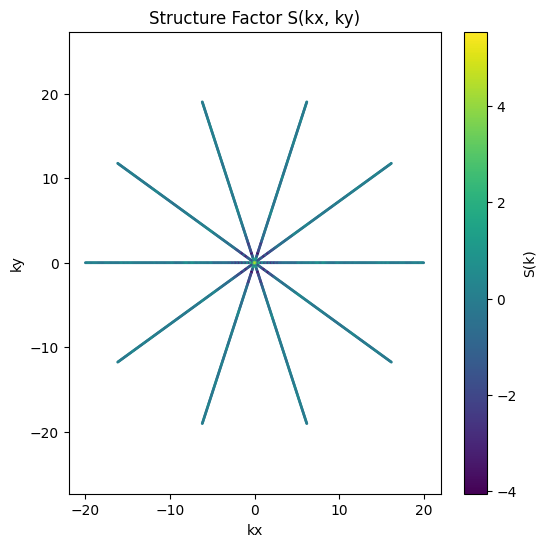

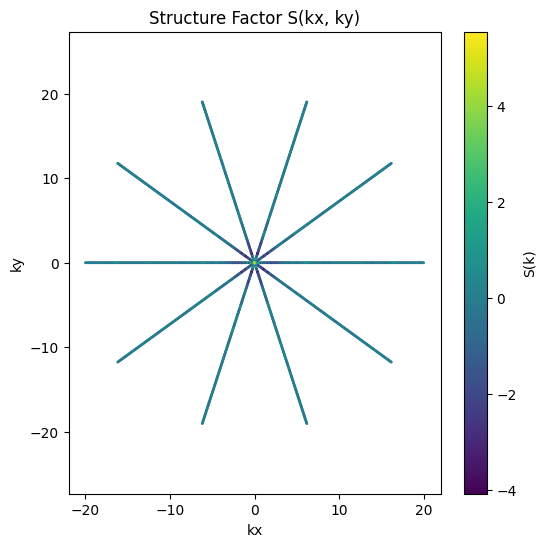

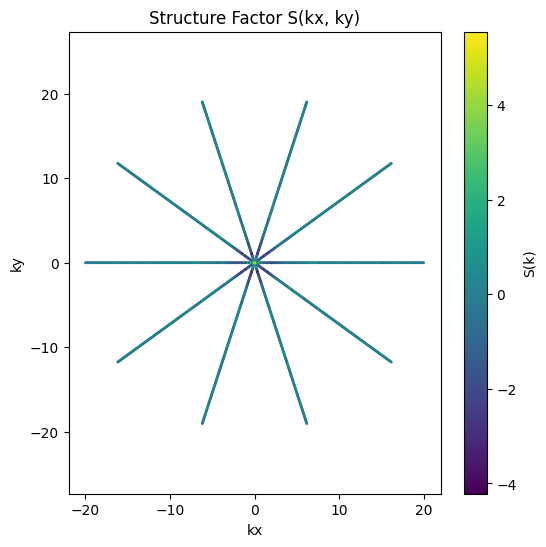

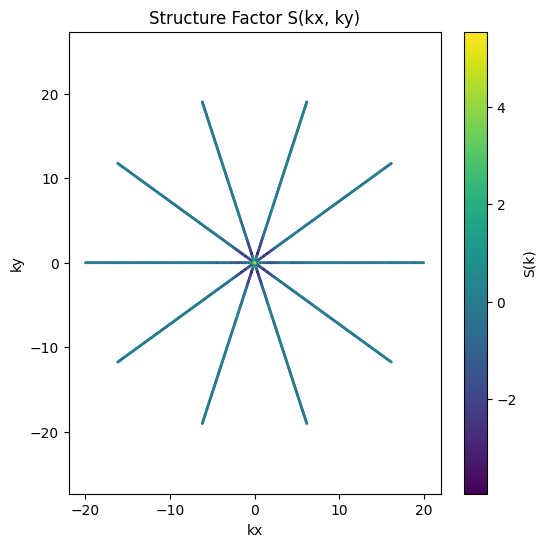

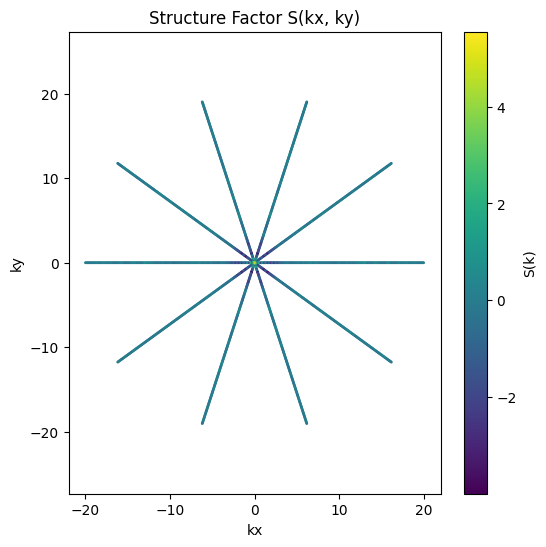

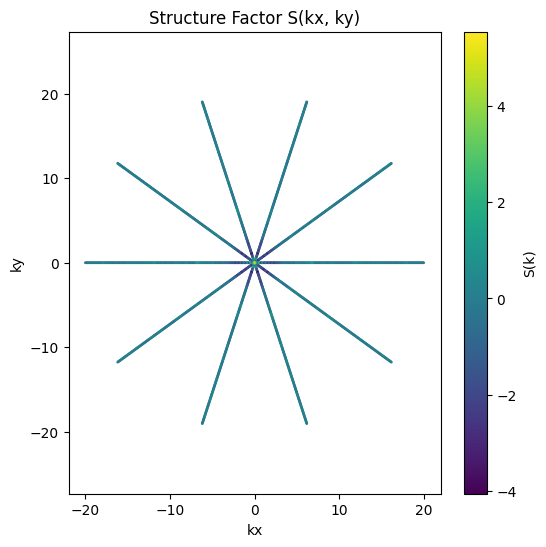

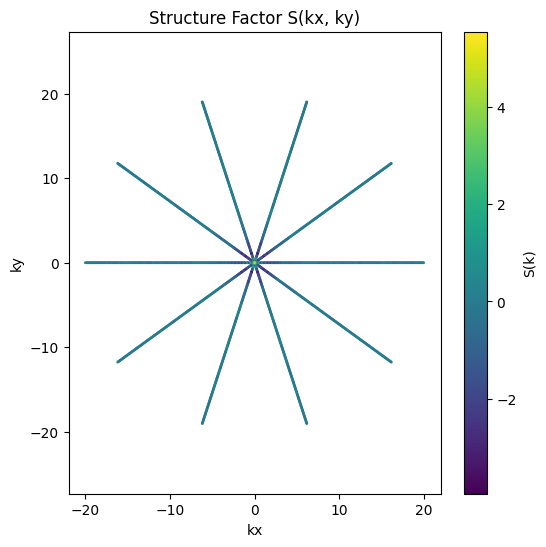

batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0


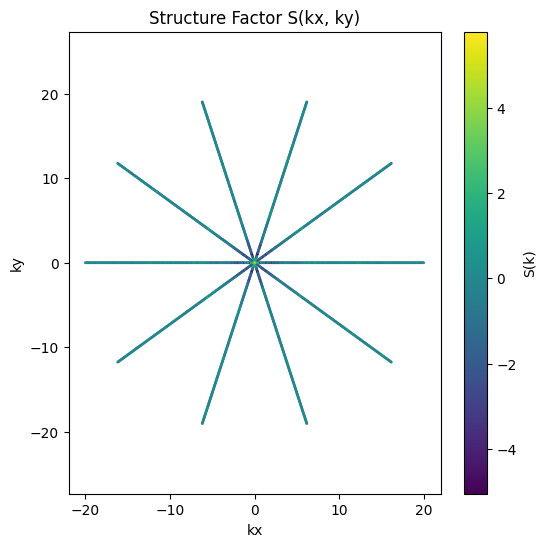

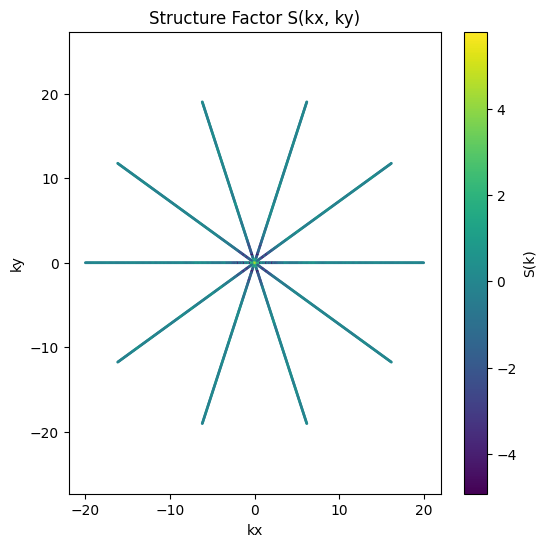

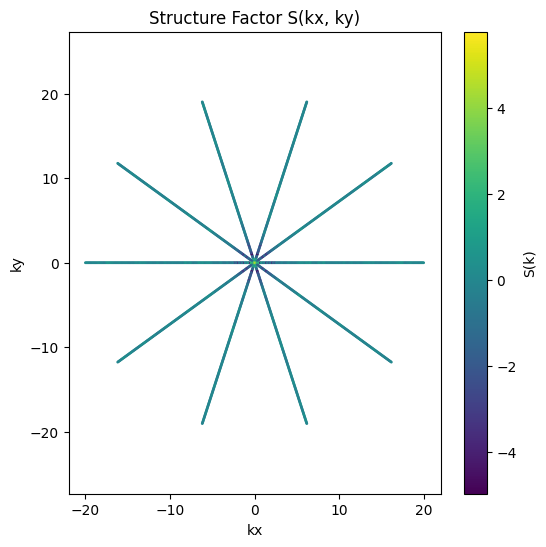

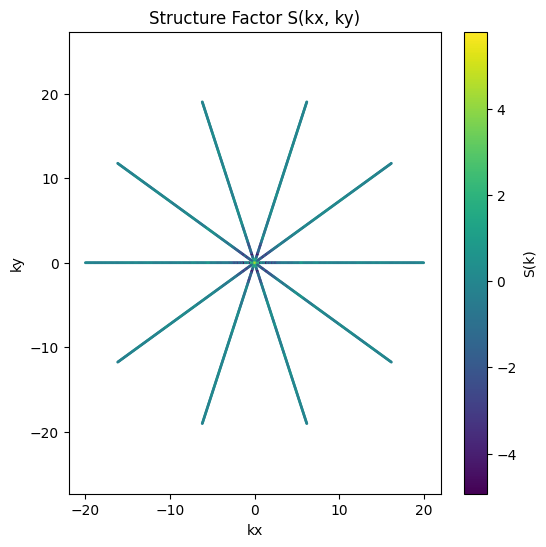

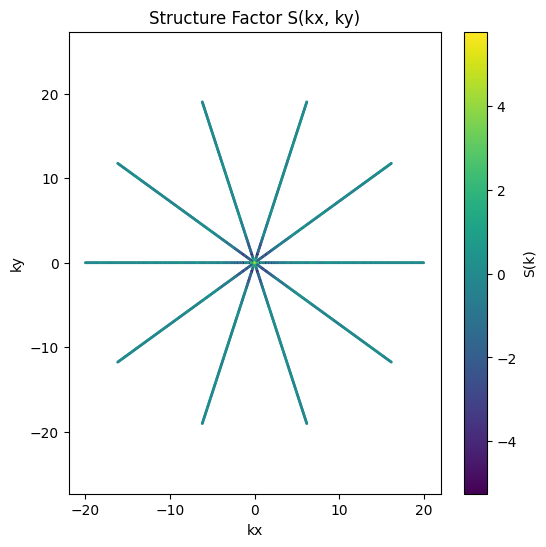

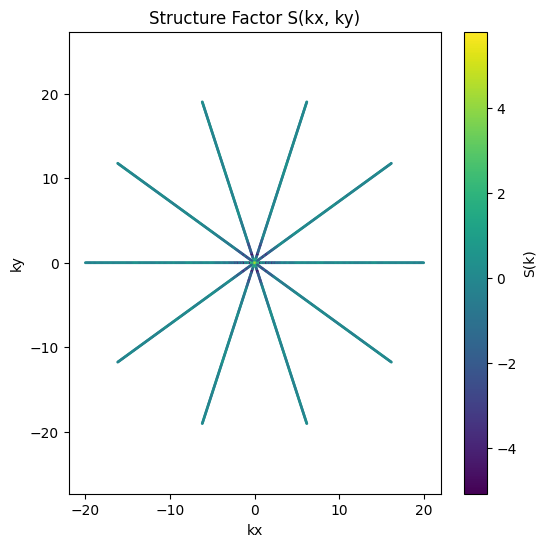

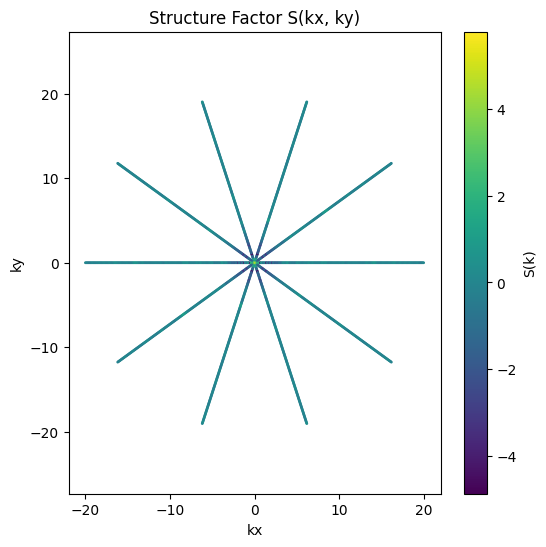

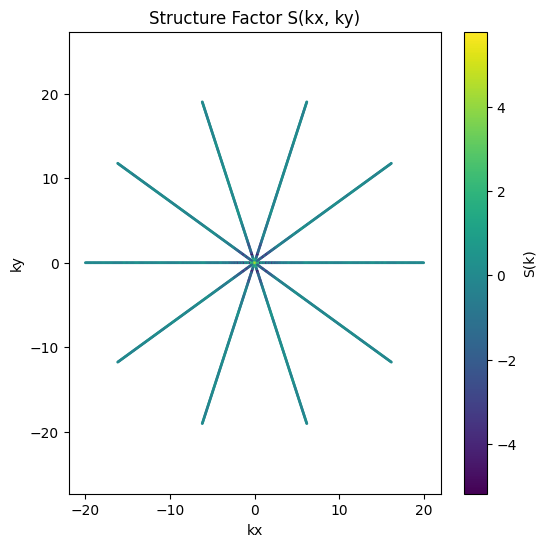

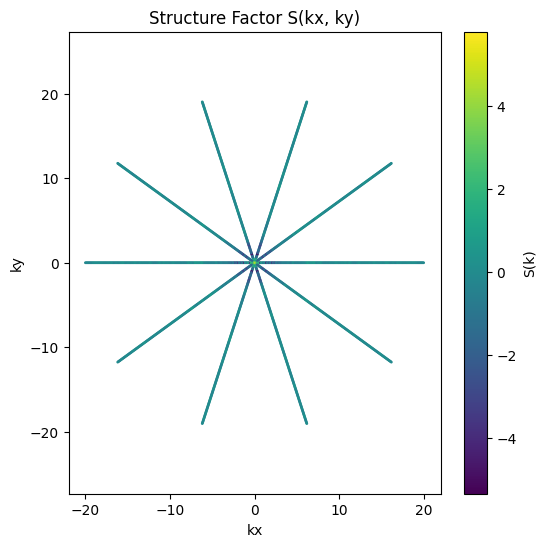

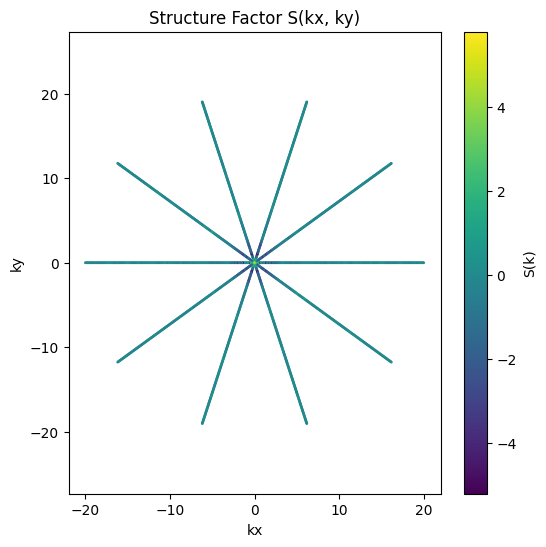

batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0
batch 0.0 of 2.0
batch 1.0 of 2.0


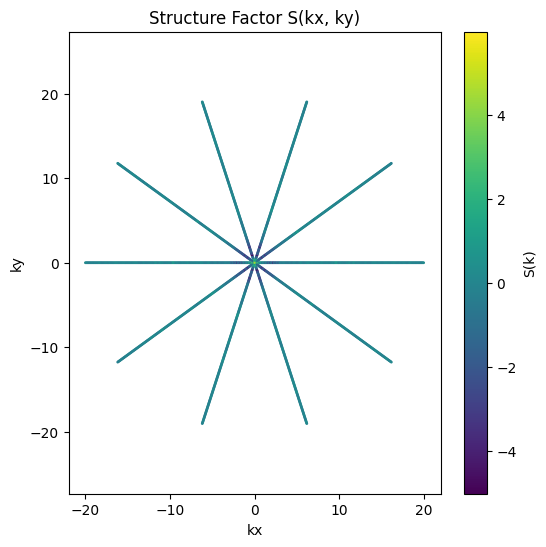

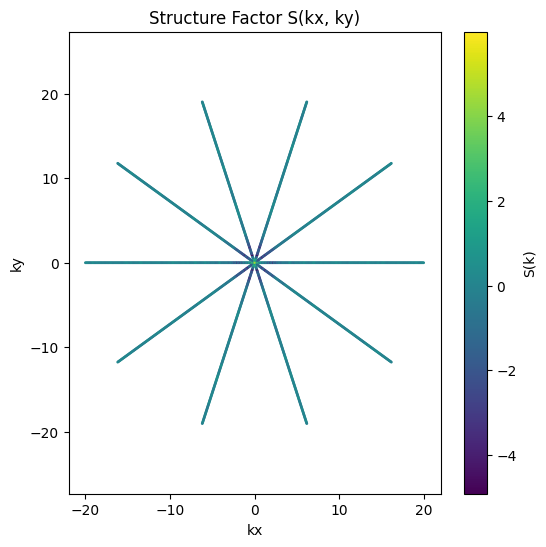

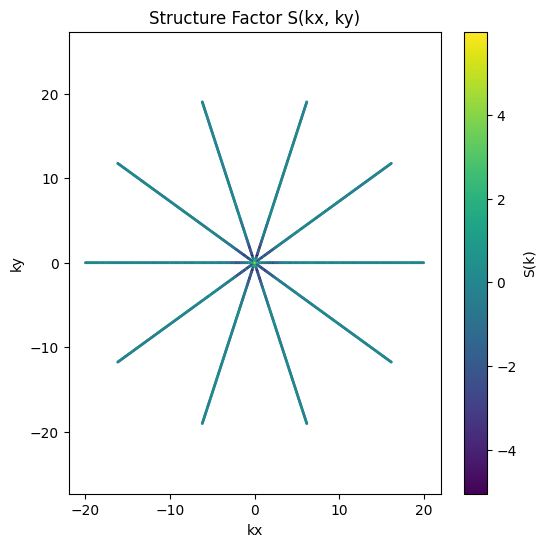

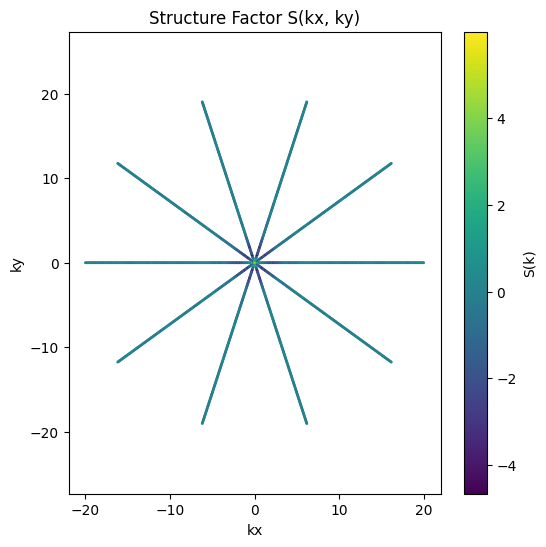

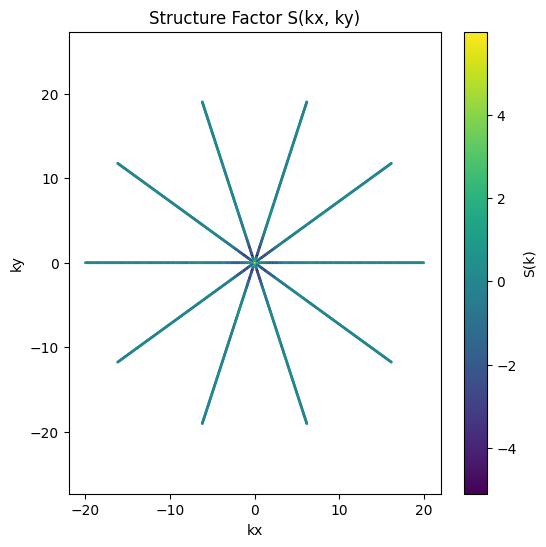

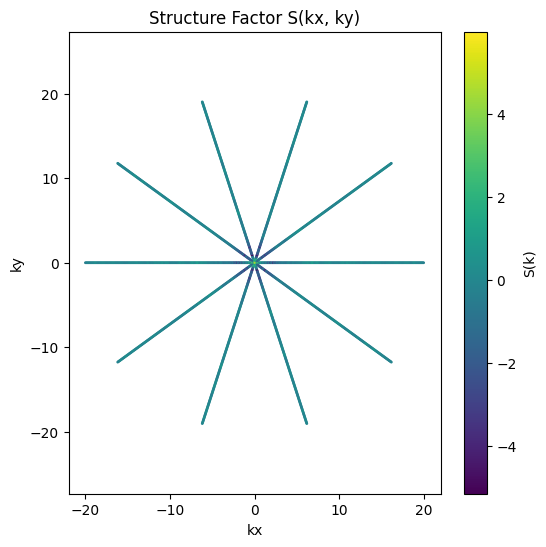

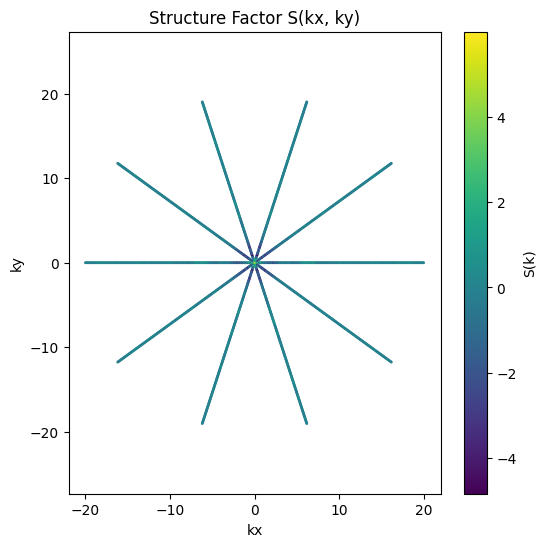

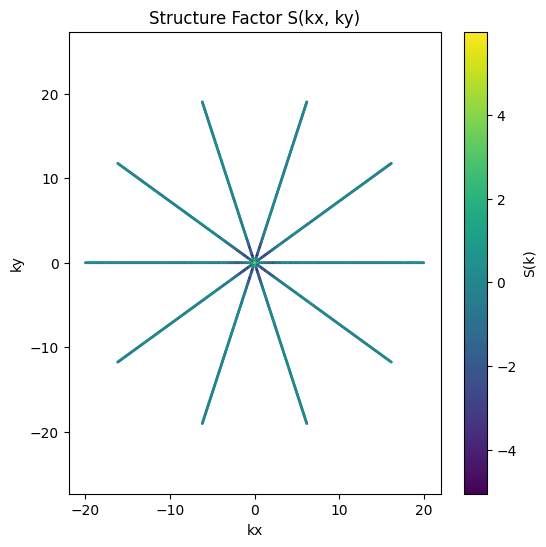

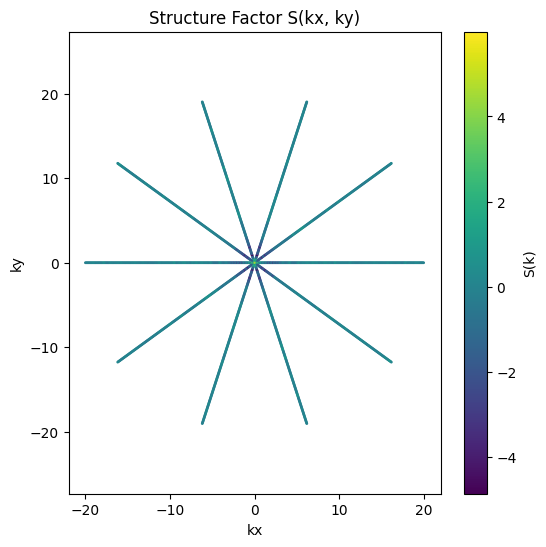

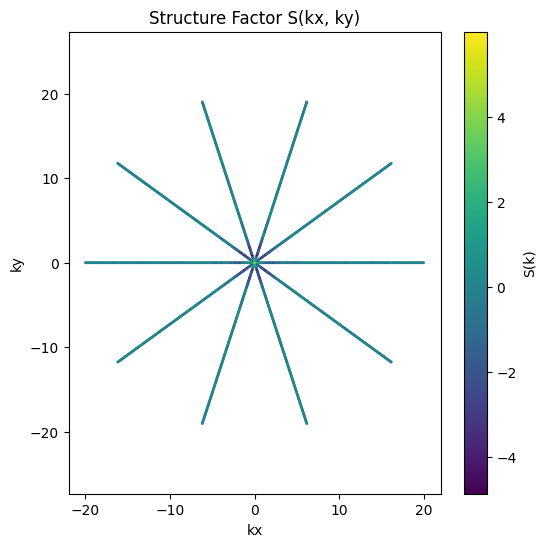

batch 0.0 of 2.0


MemoryError: Unable to allocate 4.75 GiB for an array with shape (311, 1024, 1000) and data type complex128

In [2]:
S_2d_all = {}
for N in Ns:
    results = {}
    
    for i in range(1,11):
        folder = rf"100_Ensemble\N={N}_pin=0\N={N}\coordinate_p0=3.80_v0=0.50_pin=0_set_{i}/"
        timestamps, arrays = get_data_from_folder(folder)
        
        
        k_vectors, context = get_polar_k_grid(n_k = 200, n_theta = 10, k_max = 20)
        S_flat = Sf_iso(k_vectors, arrays, batch_size = 1000)
        
        results[i] = S_flat
        
        
        
    S_2d_ensemble = display_polar_k_grid(results[1].mean(axis = 0), context)
    for i in range(2,11):
        S_2d_ensemble += display_polar_k_grid(results[i].mean(axis = 0), context)
    S_2d_ensemble/=10
    
    S_2d_all[N] = S_2d_ensemble
    


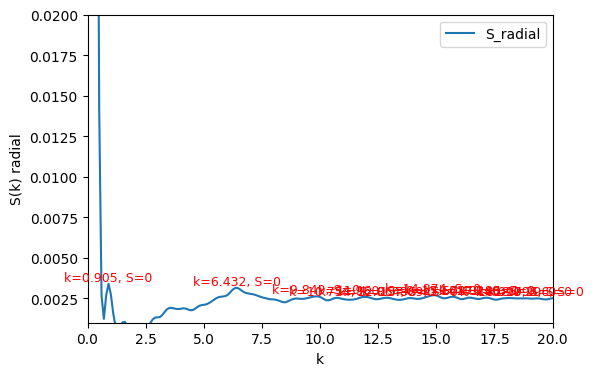

100 6.432160804020101


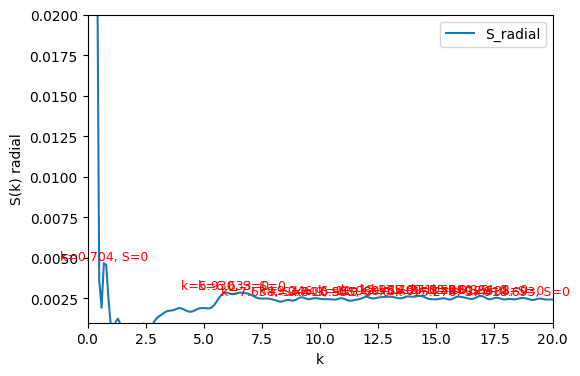

144 5.9296482412060305


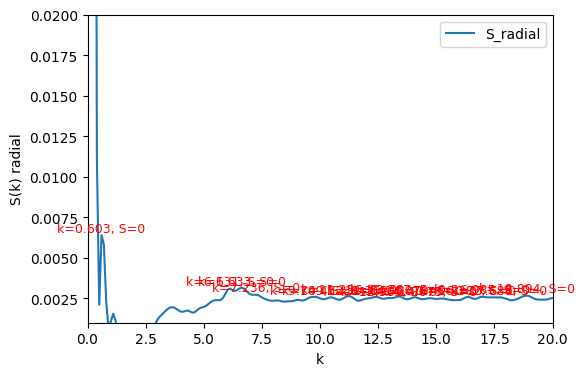

196 6.633165829145729


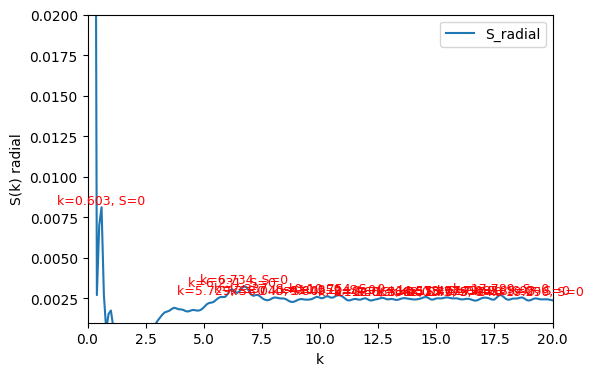

256 6.733668341708543


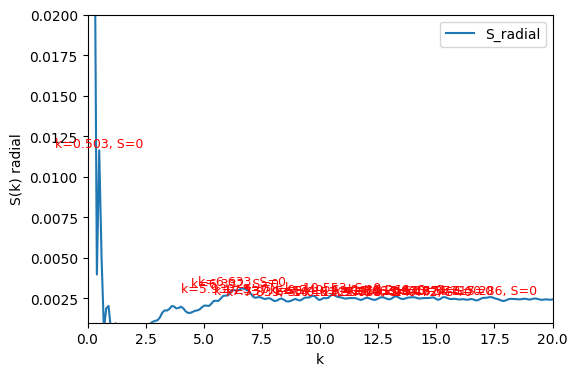

324 6.633165829145729


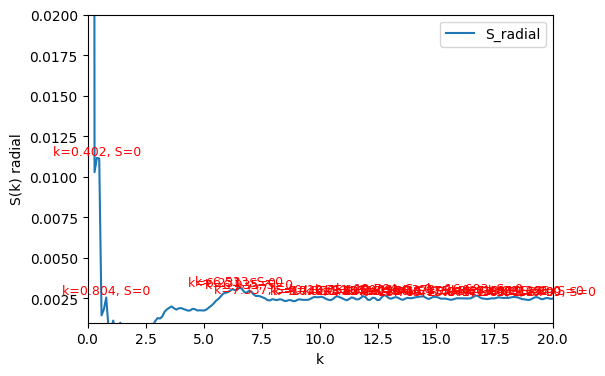

400 6.532663316582915


KeyError: 1024

In [13]:
peak_positions = {}
for N in Ns:
    peaks = get_radial_peaks(S_2d_all[N]/400, context[2], threshold = 0.0025, xlims = (0, 20), ylims = (0.001,0.02), y_log_scale=False)
    peaks = np.array(peaks)
    peaks1 = peaks[peaks[:,0] > 4, :]
    peakmax = peaks1[np.argmax(peaks1[:,1]), 0]
    peak_positions[N] = peakmax
    print(N, peakmax)

In [14]:
peak_positions

{100: np.float64(6.432160804020101),
 144: np.float64(5.9296482412060305),
 196: np.float64(6.633165829145729),
 256: np.float64(6.733668341708543),
 324: np.float64(6.633165829145729),
 400: np.float64(6.532663316582915)}

In [ ]:
# import pickle
# # Save to a file
# with open(f'Sf_results_{N}.pkl', 'wb') as f:   # 'wb' = write binary
#     pickle.dump(results, f)


In [ ]:
# with open('Sf_results_400.pkl', 'rb') as f:   # 'rb' = read binary
#     results_loaded = pickle.load(f)